In [3]:
using CBFToolbox

┌ Info: Precompiling CBFToolbox [9bb58977-20e0-447d-80ed-b4444e16eeb9]
└ @ Base loading.jl:1423


In [4]:
n = 2
m = 2
f(x) = [0.0, 0.0]
g(x) = [1.0 0.0; 0.0 1.0]
Σ = ControlAffineSystem(n, m, f, g)

ControlAffineSystem(2, 2, f, g)

In [5]:
umax = 2.0
A = [1.0 0.0; 0.0 1.0; -1.0 0.0; 0.0 -1.0]
b = umax * ones(4)

4-element Vector{Float64}:
 2.0
 2.0
 2.0
 2.0

In [6]:
V(x) = 0.5x'x
γ(s) = s
CLF = ControlLyapunovFunction(V, γ)

ControlLyapunovFunction(V, CBFToolbox.var"#∇V#16"{typeof(V)}(V), γ)

In [7]:
O1 = CircularObstacle([-1.0, 1.0], 0.4)
O2 = CircularObstacle([-0.5, -0.5], 0.4)
α(s) = s^3
CBF1 = ControlBarrierFunction(O1, α)
CBF2 = ControlBarrierFunction(O2, α)
CBFs = [CBF1, CBF2]
κ = CBFQP(Σ, CBFs, CLF, A, b)

CBFQP(CBFToolbox.var"#control#67"{ControlAffineSystem, Vector{ControlBarrierFunction}, ControlLyapunovFunction, Matrix{Float64}, Vector{Float64}, Float64}(ControlAffineSystem(2, 2, f, g), ControlBarrierFunction[ControlBarrierFunction(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.4)), CBFToolbox.var"#∇h#26"{CBFToolbox.var"#h#116"{CircularObstacle}}(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-1.0, 1.0], 0.4))), α), ControlBarrierFunction(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-0.5, -0.5], 0.4)), CBFToolbox.var"#∇h#26"{CBFToolbox.var"#h#116"{CircularObstacle}}(CBFToolbox.var"#h#116"{CircularObstacle}(CircularObstacle([-0.5, -0.5], 0.4))), α)], ControlLyapunovFunction(V, CBFToolbox.var"#∇V#16"{typeof(V)}(V), γ), [1.0 0.0; 0.0 1.0; -1.0 0.0; 0.0 -1.0], [2.0, 2.0, 2.0, 2.0], 1000.0))

In [8]:
t0 = 0.0
tf = 10.0
dt = 0.01
sim = Simulation(t0, tf, dt)

Simulation(0.0, 10.0, 0.01, 0.0:0.01:10.0)

In [9]:
x0 = [-2.2, 2.0]
T = sim(Σ, κ, x0)

CBFToolbox.Trajectory(0.0:0.01:10.0, [-2.2 -2.189000111447514 … -0.02652432875097584 -0.026434307733039206; 2.0 1.9900001495671955 … 0.018789108749612118 0.018725340324437588], [1.0999888552486425 1.0944853567065453 … 0.009002101793663592 0.00895193072385828; -0.9999850432804561 -0.9949812531442461 … -0.006376842517453112 -0.006341302696834389])

In [10]:
using Plots
using LaTeXStrings
latexify_plots()

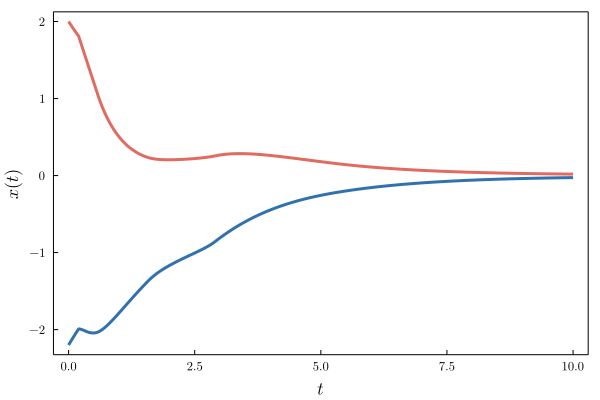

In [14]:
plot(T.t, T.x'; xlabel=L"t", ylabel=L"x(t)")

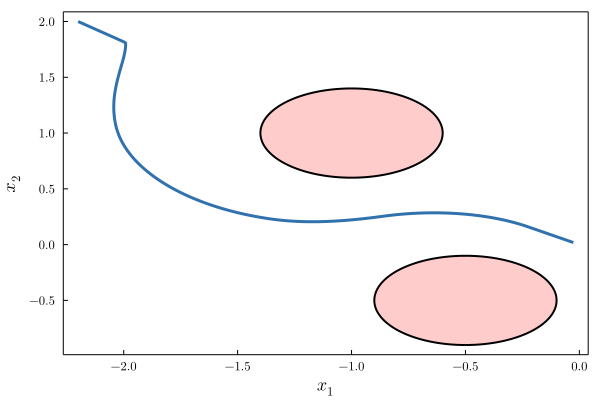

In [13]:
plot(T.x[1, :], T.x[2, :]; xlabel=L"x_1", ylabel=L"x_2")
plot!(
    circle_shape(O1);
    seriestype=[:shape],
    fillcolor=:red,
    fillalpha=0.2,
    linecolor=:black,
    lw=2,
    edgecolor=:black,
    label="",
)
plot!(
    circle_shape(O2);
    seriestype=[:shape],
    fillcolor=:red,
    fillalpha=0.2,
    linecolor=:black,
    lw=2,
    edgecolor=:black,
    label="",
)